### Binarisation

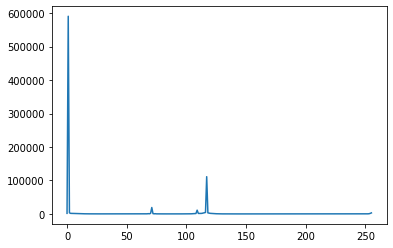

127 127.5


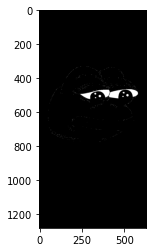

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random

img = cv.imread('pepe.png')

# convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

histogram, bin_edges = np.histogram(gray, bins=256, range=(0, 256))
plt.plot(bin_edges[:-1], histogram)
plt.show()

def localBinarisationByThresholdSegmentation(img):
    t = random.randint(0, 255)
    
    img_copy = img.copy()

    # repeat untill Ti - Ti + 1 < Tth
    while True:
        img_copy[img_copy > t] = 255
        img_copy[img_copy <= t] = 0

        t_next = (np.mean(img_copy[img_copy < t]) + np.mean(img_copy[img_copy > t])) / 2
        print(t, t_next)
        if abs(t - t_next) < 1:
            break

        t = t_next
    
    return img_copy

result = localBinarisationByThresholdSegmentation(gray)

plt.imshow(result, cmap='gray')
plt.show()
